In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os 

In [2]:
players = pd.read_csv(os.path.join('nba', 'Player Totals.csv'))
career = pd.read_csv(os.path.join('nba', 'Player Career Info.csv'))
awards = pd.read_csv(os.path.join('nba', 'Player Award Shares.csv'))
winner = awards['winner'] ==True
awards_w = awards[winner]
players.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

## preprocessing delle informazioni interessanti relative ai giocatori 

In [3]:
df = players.merge(career, how='left').merge(awards_w, how='left')
df.to_parquet(os.path.join('players_summary.parquet'))
df

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,hof,num_seasons,first_seas,last_seas,award,first,pts_won,pts_max,share,winner
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,False,2.0,2023.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,False,2.0,2023.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,False,2.0,2023.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,False,10.0,2015.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,False,6.0,2019.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31872,200,1947,157,Walt Miller,NaN,F,31.0,1,BAA,PIT,...,False,1.0,1947.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN
31873,201,1947,158,Warren Fenley,NaN,F,24.0,1,BAA,BOS,...,False,1.0,1947.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN
31874,202,1947,159,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,...,False,1.0,1947.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN
31875,203,1947,160,Woody Grimshaw,NaN,G,27.0,1,BAA,PRO,...,False,1.0,1947.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN


# chi è il giocatore più forte 

il giocatore con più punti segnati della storia 

In [4]:
top10_score = players.loc[:, ['player', 'pts']].groupby('player').sum().sort_values(by='pts', ascending=False).head(6)
top10_score

,pts
player,
LeBron James,40474
Kareem Abdul-Jabbar,38387
Karl Malone,36928
Wilt Chamberlain,33953
Kobe Bryant,33643
Michael Jordan,32292


vediamo i giocatori con più trofei vinti

In [5]:
df.loc[df['winner'] == True].groupby('player').count()['winner'].sort_values(ascending=False).head(6)

player
Michael Jordan           7
Kareem Abdul-Jabbar      7
LeBron James             5
Bill Russell             5
Larry Bird               4
Giannis Antetokounmpo    4
Name: winner, dtype: int64

notiamo che abbiamo dei giocatori che compaiono anche nella classifica dei top 6 scorer 

il giocatore più forte è quello che vince più trofei individuali?
sicuramente è un indizio sulla qualità del giocatore ma non dice sempre tutto sulla forza, a che serve essere individualmente il più forte della squadra se non si vince di squadra 

vediamo chi è il difensore con più Defensive Player Of the Year

In [6]:
df.loc[(df['winner'] == True) & (df['award'] =='dpoy')].groupby('player').count()['winner'].sort_values(ascending=False).head(6)

player
Ben Wallace        4
Dikembe Mutombo    4
Rudy Gobert        3
Dwight Howard      3
Alonzo Mourning    2
Sidney Moncrief    2
Name: winner, dtype: int64

la classifica qui è totalmente diversa

come possiamo classificare il migliore della storia?
proviamo a vedere la media delle statistiche di ogni giocatore, chi rientra in ogni parametro

In [7]:
stats = df.loc[:, ['player', 'g','trb', 'ast', 'stl', 'blk','pts']].dropna().groupby('player').sum() # i giocatori di cui non sappiamo le statistiche non possono essere significativi per la nostra analisi 
stats2 = stats
for col in stats.columns[1:]:
    stats[col] = stats[col] / stats['g']

stats.sort_values(by=['pts', 'trb', 'ast', 'stl', 'blk'], ascending=False).head(20)

,g,trb,ast,stl,blk,pts
player,,,,,,
Michael Jordan,1154,6.170711,5.301560,2.402946,0.887348,30.467938
Luka Dončić,400,8.680000,8.292500,1.167500,0.455000,28.675000
Joel Embiid,433,11.159353,3.632794,0.916859,1.662818,27.877598
Kevin Durant,1108,7.009928,4.404332,1.045126,1.139892,27.337545
LeBron James,1492,7.496649,7.378686,1.524799,0.744638,27.127346
Allen Iverson,1064,3.608083,6.097744,2.079887,0.173872,25.805451
Trae Young,407,3.565111,9.503686,1.017199,0.152334,25.501229
George Gervin,1104,5.523551,2.632246,1.253623,1.057065,25.272645
Damian Lillard,842,4.243468,6.720903,0.954869,0.305226,25.119952


questi valori non ci potrebbero dire nulla, ma proviamo a vedere il primo, MJ, in confronto con le statistiche medie della lega

In [8]:
stats2[stats2['g'] > 300].median()

g      642.500000
trb      3.730986
ast      1.805468
stl      0.734564
blk      0.326417
pts      9.108695
dtype: float64

conclusione, non c'è un criterio preciso per decretare il migliore, per cui la discussione continua a essere un argomento da bar

## come si decreta il giocatore migliore di una stagione --> MVP
analizziamo la top 3 di ogni anno dei giocatori in corsa per ricevere tale premio 

In [9]:
mvp_top3=awards[awards['award']=='nba mvp'].groupby('season').head(3).loc[:,['season','award','player','tm','pts_won','winner']]
teams = pd.read_parquet(os.path.join('team_summary.parquet'))
mvp_top3 = mvp_top3.rename({'tm':'abbreviation'},axis=1).merge(teams).loc[:,['season','award','player','pts_won','winner','team', 'w','l', 'playoffs']]
mvp_top3

,season,award,player,pts_won,winner,team,w,l,playoffs
0,2023,nba mvp,Joel Embiid,915.0,True,Philadelphia 76ers,54.0,28.0,True
1,2023,nba mvp,Nikola Jokić,674.0,False,Denver Nuggets,53.0,29.0,True
2,2023,nba mvp,Giannis Antetokounmpo,606.0,False,Milwaukee Bucks,58.0,24.0,True
3,2022,nba mvp,Nikola Jokić,875.0,True,Denver Nuggets,48.0,34.0,True
4,2022,nba mvp,Joel Embiid,706.0,False,Philadelphia 76ers,51.0,31.0,True
...,...,...,...,...,...,...,...,...,...
199,1957,nba mvp,Bob Pettit,21.0,False,St. Louis Hawks,34.0,38.0,True
200,1957,nba mvp,Paul Arizin,9.0,False,Philadelphia Warriors,37.0,35.0,True
201,1956,nba mvp,Bob Pettit,33.0,True,St. Louis Hawks,33.0,39.0,True
202,1956,nba mvp,Paul Arizin,21.0,False,Philadelphia Warriors,45.0,27.0,True


analizziamo il record di ogni squadra dei giocatori vincitori del premio, in particolare vediamo prima il record dei vincitori e confrontiamo il risultato con il record dei non vincitori cercando di vedere chi è il piu alto 

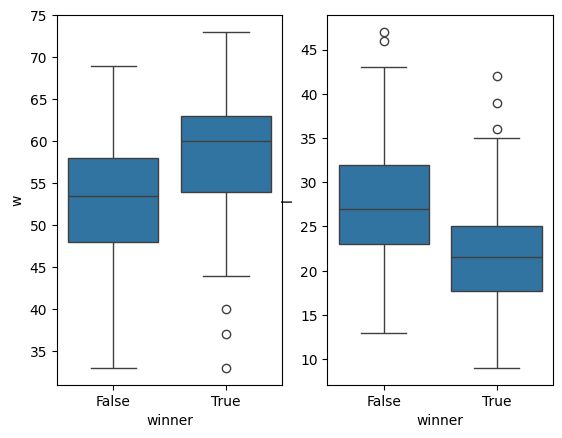

In [10]:
wl_winners = mvp_top3.loc[mvp_top3['winner'] == True, ['w', 'l']]
wl_losers = mvp_top3.loc[mvp_top3['winner'] == False, ['w', 'l']]

plt.subplot(121)
sns.boxplot(mvp_top3,x='winner', y='w')
plt.subplot(122)
sns.boxplot(mvp_top3, x='winner',y='l')
plt.show()

possiamo notare dal grafico, i giocatori che hanno vinto il premio hanno la squadra con mediamente il numero di vittorie maggiori

adesso vediamo anche il rapporto w/l per vedere ancora meglio la differenza

<Axes: xlabel='winner', ylabel='ratio'>

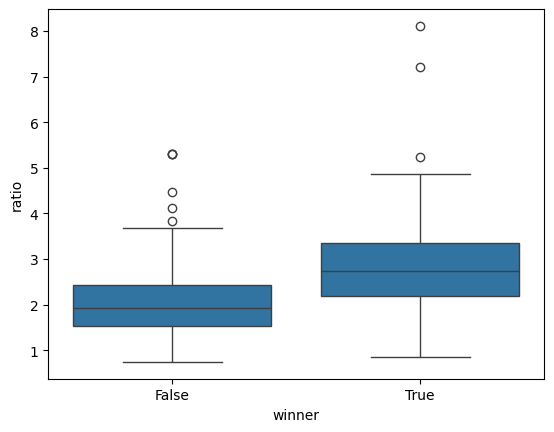

In [11]:
mvp_top3['ratio'] = mvp_top3['w']/mvp_top3['l']
sns.boxplot(mvp_top3, x='winner', y='ratio')

possiamo quindi affermare che in generale tra i candidati al premio viene assegnato alla squadra che vince di più 

<Axes: xlabel='team', ylabel='winner'>

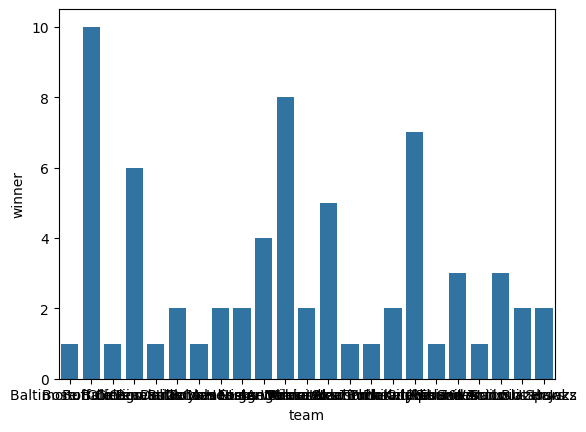

In [12]:
sns.barplot(mvp_top3.loc[mvp_top3['winner']==True].groupby('team').count()['winner'])

# effective field goal percentage

<Axes: xlabel='e_fg_percent', ylabel='mp'>

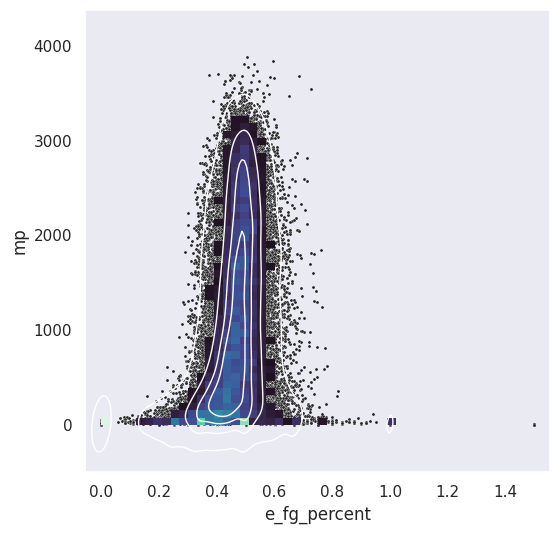

In [13]:
sns.set_theme(style="dark")

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(players, x='e_fg_percent', y='mp', s=5, color=".15")
sns.histplot(players, x='e_fg_percent', y='mp', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(players, x='e_fg_percent', y='mp', levels=5, color="w", linewidths=1)

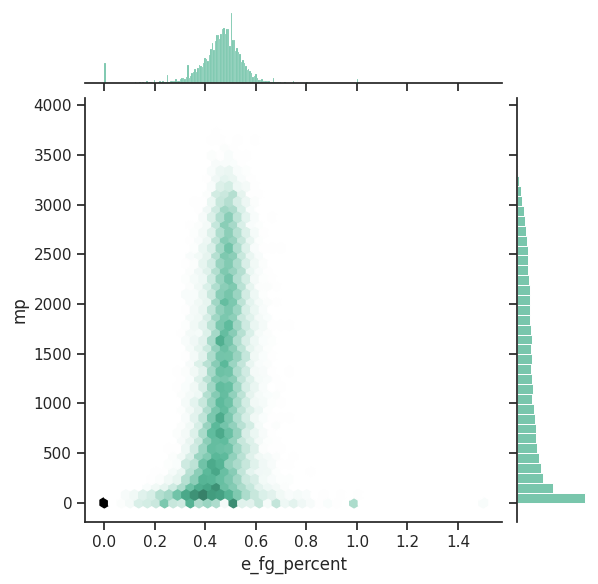

In [14]:
sns.set_theme(style="ticks")

sns.jointplot(players, x='e_fg_percent', y='mp', kind="hex", color="#4CB391")
plt.show()

In [15]:
#players=players.dropna()
ts = (players['pts']*0.5)/(players['fga']+0.475*players['fta'])
#print(ts)

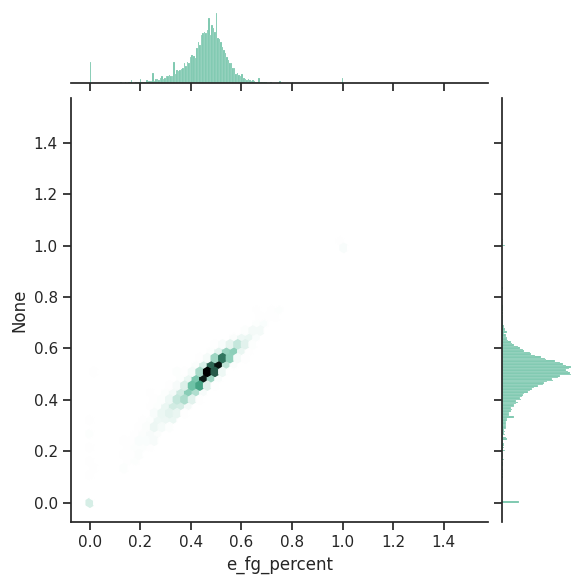

In [16]:
sns.set_theme(style="ticks")

sns.jointplot(players, x='e_fg_percent', y=ts, kind="hex", color="#4CB391")
plt.show()

<Axes: xlabel='e_fg_percent', ylabel='None'>

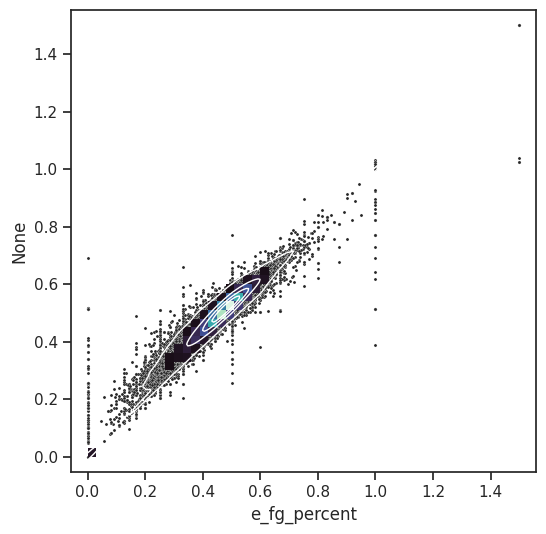

In [17]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(players, x='e_fg_percent', y=ts, s=5, color=".15")
sns.histplot(players, x='e_fg_percent', y=ts, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(players, x='e_fg_percent', y=ts, levels=5, color="w", linewidths=1)

In [18]:
#print(sp.stats.pearsonr(players['e_fg_percent'].dropna(),ts)[1])
#print(sp.stats.spearmanr(players['e_fg_percent'].dropna(),ts)[1])
#print(sp.stats.kendalltau(players['e_fg_percent'].dropna(),ts)[1])